# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
# Your code here:
diabetes = datasets.load_diabetes()

In [3]:
diabetes_explore = datasets.load_diabetes(return_X_y=True ,as_frame=True)

In [4]:
diabetes_explore[0].head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
diabetes_explore[1][:10]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
6    138.0
7     63.0
8    110.0
9    310.0
Name: target, dtype: float64

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
# Your code here:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

>**Answer:**
> - Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients
>
> - `diabetes['target']` is a quantitative measure of disease progression one year after baseline measurements from above were taken for the 442 diabetis patients
>
> - There are 442 records in the dataset

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [7]:
# Your code here:
x = diabetes['data'].shape
y = diabetes['target'].shape
print(f'data shape : {x},\ntarget shape: {y}')

data shape : (442, 10),
target shape: (442,)


In [8]:
x = diabetes['data'].dtype
y = diabetes['target'].dtype
print(f'data dtypes : {x},\ntarget dtypes: {y}')

data dtypes : float64,
target dtypes: float64


>**Answer:**
>based on the check the `diabetes` dataset indeed contains 442 records in both `data` and `target`, containing 10 and 1 numeric variables respectively 

# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [9]:
# imported in In[1]

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [10]:
# Your code here:
diabetes_model = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [11]:
# Your code here:
# diabetes_data_train, diabetes_target_train, diabetes_data_test, diabetes_target_test = train_test_split(diabetes['data'], diabetes['target'], test_size = 20/len(diabetes['target']))
diabetes_data_train, diabetes_data_test = diabetes['data'][:-20],diabetes['data'][-20:]
diabetes_target_train, diabetes_target_test = diabetes['target'][:-20],diabetes['target'][-20:]

print(diabetes_data_train.shape, diabetes_target_train.shape, diabetes_data_test.shape, diabetes_target_test.shape)

(422, 10) (422,) (20, 10) (20,)


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [12]:
# Your code here:
model_linreg = diabetes_model.fit(diabetes_data_train, diabetes_target_train)
print(model_linreg.intercept_, model_linreg.coef_)

152.76430691633442 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [13]:
# Your code here:
predicted_target = model_linreg.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [15]:
# Your code here:
compare=pd.DataFrame({'test':list(diabetes_target_test), 'precicted':list(predicted_target)})
compare

,test,precicted
0,233.0,197.618469
1,91.0,155.439793
2,111.0,172.886651
3,152.0,111.535373
4,120.0,164.800548
5,67.0,131.069549
6,310.0,259.122378
7,94.0,100.479352
8,183.0,117.060105
9,66.0,124.305036


#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

>**Answer:** It is not, we see many significant deviations, which are evident in the table above and the plot below.

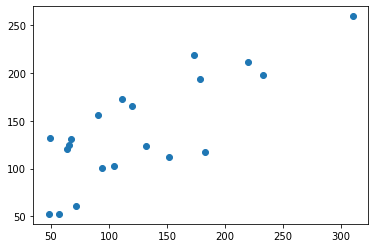

In [16]:
# Your explanation here:
plt.scatter(compare.test, compare.precicted)

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../images/statsmodels.png)

In [17]:
# Your code here:
Y = diabetes_target_train
X = diabetes_data_train
X = sm.add_constant(X)
res = sm.OLS(Y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           4.64e-58
Time:                        17:25:53   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.000     147.539     157.990
x1             0.3035     61.286      0.005      0.996    -120.169     120.776
x2          -237.6393     62.837     -3.782      0.000    -361.162    -114.117
x3           510.5306     68.156      7.491      0.000     376.553     644.508
x4           327.7370     66.876      4.901      0.000     196.275     459.199
x5          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
x6           492.8146    344.227      1.432      0.153    -183.850    1169.480
x7           102.8485    219.463      0.469      0.640    -328.561     534.258
x8           184.6065    167.336      1.103      0.271    -144.334     513.547
x9           743.5196    175.359      4.240      0.000     398.807    1088.232
x10           76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [18]:
features= list(['const'])
features.extend(list(diabetes_explore[0].columns))
print(features)

pvals = pd.DataFrame({'feature':features, 'pvalues':res.pvalues})
pvals[pvals['pvalues']>=0.05]

['const', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,feature,pvalues
1,age,0.996051
5,s1,0.055559
6,s2,0.153002
7,s3,0.639578
8,s4,0.270581
10,s6,0.265827


>**Answer:**
>
>1. The pvalue of F-score is 0.000, so the null hyphothesis is rejected
>2. The t-tests of the coefficients produce a confidence interval containing zero for the `age`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6`
>3. I will to drop the `age`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6` and build the improved model in the cell below:

In [19]:
Y = diabetes_target_train
X = diabetes_data_train[:,(1,2,3,8)]
X = sm.add_constant(X)
res = sm.OLS(Y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     96.12
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           6.96e-58
Time:                        17:25:53   Log-Likelihood:                -2294.7
No. Observations:                 422   AIC:                             4599.
Df Residuals:                     417   BIC:                             4620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8790      2.725     56.112      0.000     147.523     158.235
x1          -131.8626     58.938     -2.237      0.026    -247.715     -16.011
x2           593.1621     65.915      8.999      0.000     463.595     722.729
x3           298.1175     65.412      4.558      0.000     169.540     426.695
x4           547.0556     65.697      8.327      0.000     417.916     676.195
==============================================================================
Omnibus:                        5.134   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.979
Skew:                           0.123   Prob(JB):                        0.137
Kurtosis:                       2.593   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [20]:
# Your code here:
auto = pd.read_csv('../data/auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [21]:
# Your code here:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [22]:
# All variables are detected corrrectly
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [23]:
auto.describe()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [24]:
# Your code here:
print(f"newest model year is {auto.describe().model_year['min']}\noldest model year is {auto.describe().model_year['max']}")

newest model year is 70.0
oldest model year is 82.0


Check the dataset for missing values and remove all rows containing at least one missing value.

In [25]:
# Your code here:
auto.isnull().sum()
auto=auto[auto.isnull().any(axis=1) != True]
auto.shape

(392, 8)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [26]:
# Your code here:
auto.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

> There are 5 possible values of the cylinders

In [27]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


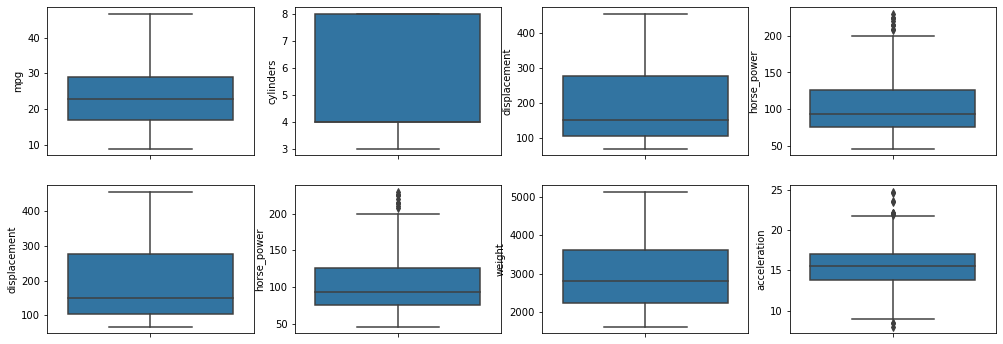

In [28]:
fix, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (17,6))

lst = list(auto.columns[:-1])

for i in range(2):
    for j in range(4):
        sns.boxplot(data = auto, y = lst[2*i+j], ax = ax[i,j])
        ax[i,j].tick_params(axis='x', rotation=90)

plt.xticks(rotation=90)    
plt.show()

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [29]:
# Your code here:
auto = auto.drop(columns = 'car_name', axis =1)

In [30]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [93]:
X_train, X_test, y_train, y_test = train_test_split(auto.iloc[:,1:], auto.iloc[:,:1], test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313, 1), (79, 1))

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [94]:
# Your code here:
auto_model = linear_model.LinearRegression()
auto_model = auto_model.fit(X_train, y_train)
auto_model

LinearRegression()

# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../images/r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [105]:
# Your code here:
y_pred = auto_model.predict(X_train)
r2_full_train = metrics.r2_score(y_train, y_pred)
print(f'r2 for train set = {r2_full_train:0.2f}')

r2 for train set = 0.82


>**Comment**: Coefficient of determination for the train set is `0.81`, which is relatively high, especially for a real world data

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [106]:
# Your code here:
y_test_pred = auto_model.predict(X_test)
r2_full_test = metrics.r2_score(y_test, y_test_pred)
print(f'r2 for test set = {r2_full_test:0.2f}')

r2 for test set = 0.75


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (`0.82` vs `0.75`). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [97]:
# Your code here:
X_train09, X_test09, y_train09, y_test09 = train_test_split(auto.iloc[:,1:], auto.iloc[:,:1], test_size = 0.1)
X_train09.shape, X_test09.shape, y_train09.shape, y_test09.shape

((352, 6), (40, 6), (352, 1), (40, 1))

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [98]:
# Your code here:
auto_model09 = linear_model.LinearRegression().fit(X_train09, y_train09)

Compute the predicted values and r squared score for our new model and new sample data.

In [99]:
# Your code here:
y_pred09 = auto_model.predict(X_train09)
r2_09_train = metrics.r2_score(y_train09, y_pred09)
print(f'r2 for train set = {r2_09_train:0.2f}')

r2 for train set = 0.81


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [100]:
# Your code here:
y_test_pred09 = auto_model.predict(X_test09)
r2_09_test = metrics.r2_score(y_test09, y_test_pred09)
print(f'r2 for test set = {r2_09_test :0.2f}')

r2 for test set = 0.79


>**Comment:** The values for the r2 for training and test data sets are now `0.81` and `0.79`, which are more similar compared to the earlier test-train split. This is an indication, that by increasing the train sample we have improved generalisation power of the model

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [39]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [40]:
# Your code here:
selector = RFE(auto_model, n_features_to_select=3)

Fit the model and print the ranking

In [54]:
# Your code here:
selector = selector.fit(X_train, y_train)
print(f'features ranking {selector.ranking_}')

features ranking [1 1 4 2 3 1]


In [57]:
features_ranking = pd.DataFrame({'feature':X_train.columns, 'feature_ranking':selector.ranking_})

print('The three most important features are:')
pd.DataFrame(features_ranking[features_ranking['feature_ranking'] == 1].feature)

The three most important features are:


,feature
0,cylinders
1,displacement
5,model_year


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [101]:
# Your code here:
X = auto.iloc[:,1:][features_ranking[features_ranking['feature_ranking'] == 1].feature]
Y = auto.iloc[:,:1]

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, Y, test_size = 0.2)
X_train_reduced.shape, X_test_reduced.shape,  y_train_reduced.shape, y_test_reduced.shape,

((313, 3), (79, 3), (313, 1), (79, 1))

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [102]:
# Your code here: 
auto_model_reduced = linear_model.LinearRegression().fit(X_train_reduced, y_train_reduced)

In [103]:
y_train_reduced_predict = auto_model_reduced.predict(X_train_reduced)
y_test_reduced_predict = auto_model_reduced.predict(X_test_reduced)

In [104]:
r2_train_reduced = metrics.r2_score(y_train_reduced, y_train_reduced_predict)
r2_test_reduced = metrics.r2_score(y_test_reduced, y_test_reduced_predict)
print(f'r2 for train set in the *reduced* model = {r2_train_reduced:0.2f}')
print(f'r2 for test set in the *reduced* model = {r2_test_reduced:0.2f}\n')
print(f'r2 for train set in the *full* model = {r2_full_train:0.2f}')
print(f'r2 for test set in the *full* model = {r2_full_test:0.2f}')

r2 for train set in the *reduced* model = 0.73
r2 for test set in the *reduced* model = 0.77

r2 for train set in the *full* model = 0.82
r2 for test set in the *full* model = 0.75


>**Comment:** Reduction of the model did not improve the r2 score. However, this should not be expected, because it is possible that the full model was overfitted due to inclusion of reduntant features. This can inflate r2. Also it is difficult to say if the generalisation power impoved on this particular test-train split - the r2 scores still have some distance between them. Also, worth noting that r2 for test set is higher than r2 for train test, which is unusual, but perfectly explainable by the random variation

#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.

### r2 score changes with train-test split 

In [128]:
from time import time

In [112]:
X = auto.iloc[:,1:][features_ranking[features_ranking['feature_ranking'] == 1].feature]
Y = auto.iloc[:,:1]

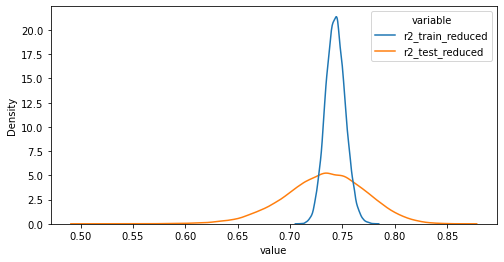

time elapsed: 5.5min


In [138]:
r2_train_reduced = []
r2_test_reduced = []

t0=time()

for k in range(50000):
    X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, Y, test_size = 0.2)
    auto_model_reduced = auto_model_reduced.fit(X_train_reduced,y_train_reduced)
    r2_train_reduced.append(metrics.r2_score(y_train_reduced, auto_model_reduced.predict(X_train_reduced)))
    r2_test_reduced.append(metrics.r2_score(y_test_reduced, auto_model_reduced.predict(X_test_reduced)))
    
df = pd.DataFrame({'r2_train_reduced':r2_train_reduced, 'r2_test_reduced':r2_test_reduced}).melt()

fix, ax = plt.subplots(ncols = 1, figsize = (8,4))
sns.kdeplot(data = df, x = 'value', hue = 'variable')
plt.show()
print(f'time elapsed: {(time()-t0)/60:0.1f}min')